## Important Notes
1. Every section is in a cell
2. You can see all the results in folder **model_results**
3. You can watch all plots in folder **plots**
4. For any question you can open an issue or contact us through **Whatsapp: 0533012274 / 0544538803**
5. or mail **ranman37@gmail.com** **shanyh@gmail.com**

In [2]:
import tensorflow as tf
from io_utils import get_model_results
from mnist_stats import print_mnist_stats
from simple_model import simple_model_main
from datasets_generator import (
    apply_pca_reduction,
    create_dataset_with_filter,
    create_non_overlapping_filter_dataset,
)
from plot_utils import plot_comparison
from imbalance import prepare_over_and_under_datasets

In [3]:
# 1. Choose a Python environment and install it on your computer (PyCharm or Google Colab).
print(
    "We have used virtual environment and install all requirements listed in requirements.txt"
)

# 2. Install the following libraries: numpy, matplotlib, pandas, tensorflow, sklearn, and pytorch.
# Please see file requirements.txt for details.

We have used virtual environment and install all requirements listed in requirements.txt


In [4]:
# section 3 Write a program that loads the MNIST dataset.
def load_mnist():
    # Load the dataset
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    train = (x_train, y_train)
    test = (x_test, y_test)
    return train, test


# This is the original dataset we are going to use
train, test = load_mnist()

Number of images: 70000
Distribution of images across classes: {0: 6903, 1: 7877, 2: 6990, 3: 7141, 4: 6824, 5: 6313, 6: 6876, 7: 7293, 8: 6825, 9: 6958}
Average number of white pixels per class: {0: 592.2293205852528, 1: 698.1006728449918, 2: 615.1539341917024, 3: 620.5482425430612, 4: 642.081916764361, 5: 631.343893552986, 6: 626.2687609075043, 7: 652.6011243658303, 8: 610.3564835164835, 9: 640.6579476861167}
Standard deviation of white pixels per class: {0: 33.678417976376245, 1: 20.085412281604185, 2: 32.91386505918803, 3: 33.74005142172034, 4: 27.782422755142775, 5: 33.454476960285554, 6: 32.6452037307252, 7: 26.92546163267693, 8: 32.84410435016834, 9: 28.31171679312667}
Number of common non-white pixels per class: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


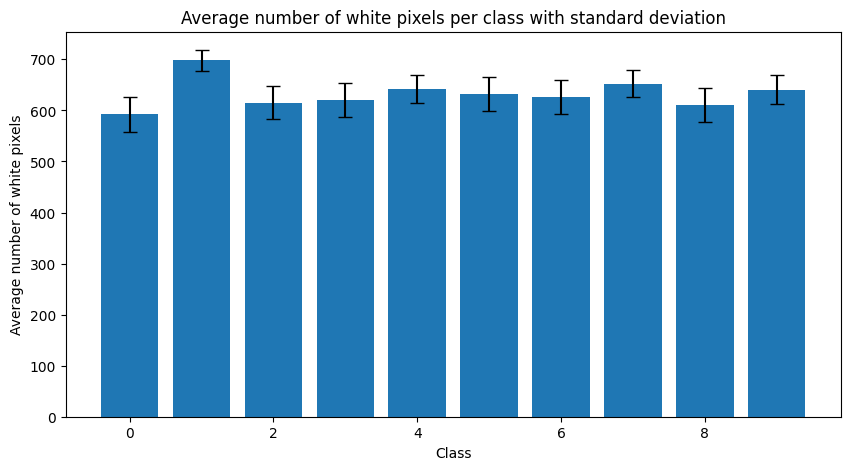

Plot saved to plots\avg_white_pixelsper_class_with_std


In [5]:
# Section 4 - please see mnist_stats.py
print_mnist_stats(train=train, test=test)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8664 - loss: 0.4698 - val_accuracy: 0.9554 - val_loss: 0.1543
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9595 - loss: 0.1377 - val_accuracy: 0.9653 - val_loss: 0.1152
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9727 - loss: 0.0907 - val_accuracy: 0.9728 - val_loss: 0.0939
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9813 - loss: 0.0654 - val_accuracy: 0.9743 - val_loss: 0.0877
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9870 - loss: 0.0466 - val_accuracy: 0.9740 - val_loss: 0.0876
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9896 - loss: 0.0351 - val_accuracy: 0.9738 - val_loss: 0.0966
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9911 - loss: 0.0290 - val_accuracy: 0.9723 - val_loss: 0.1001
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9930 - loss: 0.0259 - 

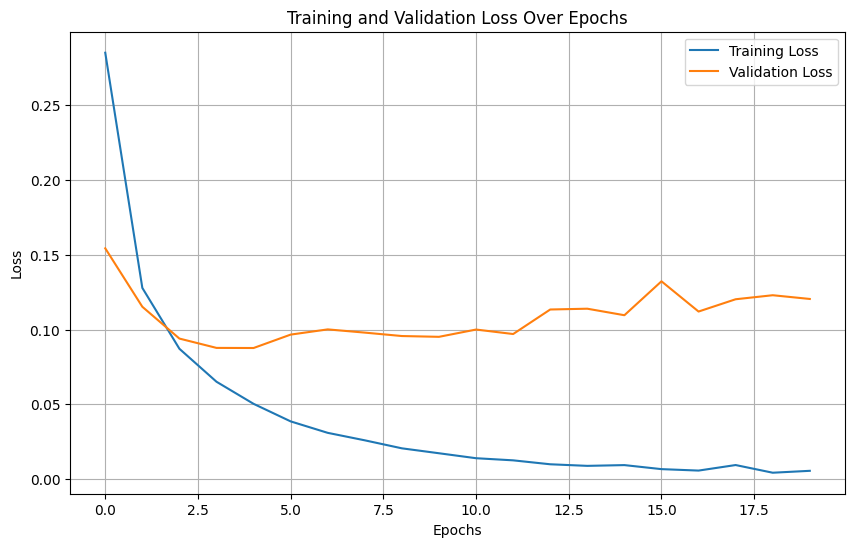

Plot saved to plots\original_loss
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9729 - loss: 0.1360
Test accuracy: 0.977400004863739
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


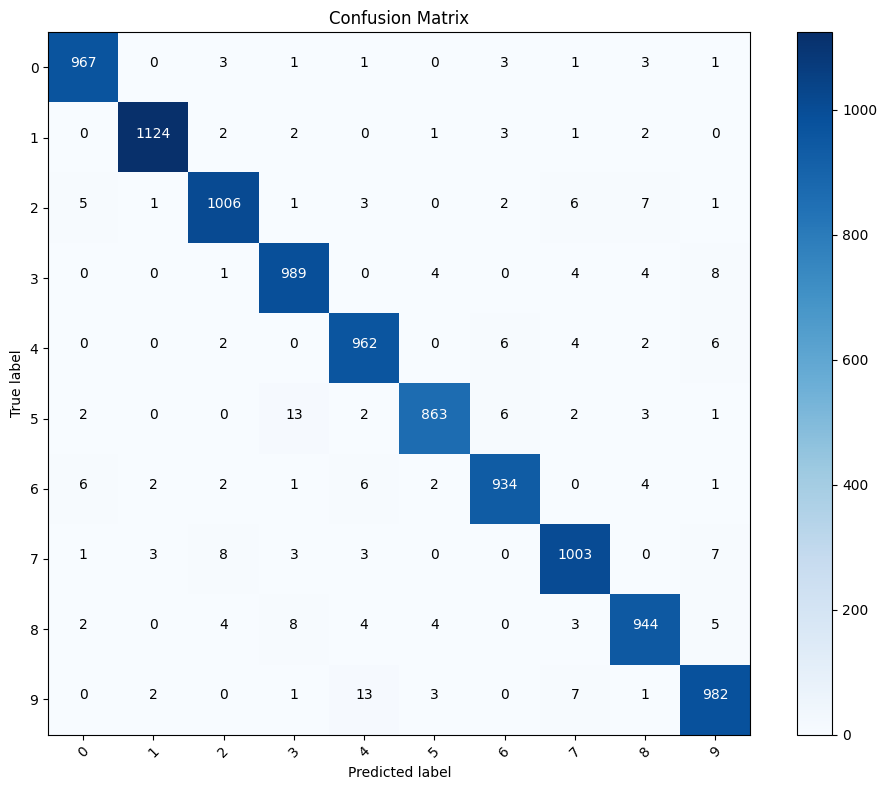

Plot saved to plots\original_confusion_matrix_simple_model


In [6]:
# Section 5,6,7 - please see simple_model.py
simple_model_main(train=train, test=test, file_prefix="original")

In [7]:
# original model results
origin_report = get_model_results("model_results/original_model.json")
print(f"original model results: {origin_report}")

original model results: {'Precision': 0.977433318963202, 'Recall (Sensitivity)': 0.9774, 'F1 Score': 0.9774028963084361, 'Sensitivity': 0.9774, 'Specificity': 0.9774}


Original training data shape: (60000, 28, 28)
Filtered training data shape: (60000, 28, 28)
Original test data shape: (10000, 28, 28)
Filtered test data shape: (10000, 28, 28)


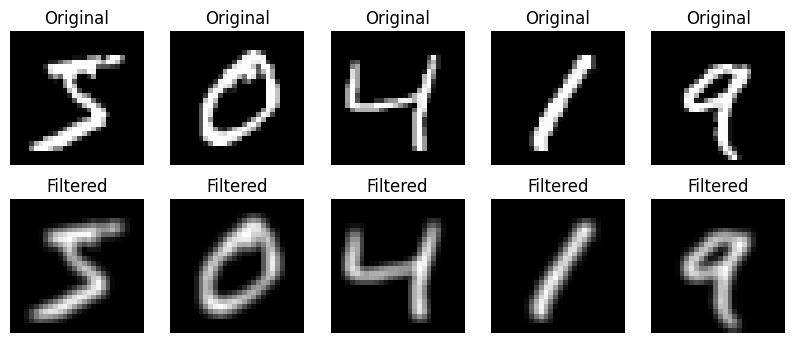

Plot saved to plots\comparison_pixel_surrounding_filter


In [8]:
# Section 8 - please see datasets_generator.py
train_filtered, test_filtered = create_dataset_with_filter(train=train, test=test)
plot_comparison(original=train[0], filtered=train_filtered[0], num_images=5)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8640 - loss: 0.4915 - val_accuracy: 0.9559 - val_loss: 0.1579
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9527 - loss: 0.1572 - val_accuracy: 0.9623 - val_loss: 0.1269
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9677 - loss: 0.1091 - val_accuracy: 0.9672 - val_loss: 0.1033
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9729 - loss: 0.0898 - val_accuracy: 0.9680 - val_loss: 0.1020
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9776 - loss: 0.0743 - val_accuracy: 0.9705 - val_loss: 0.0947
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9794 - loss: 0.0661 - val_accuracy: 0.9722 - val_loss: 0.0907
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9838 - loss: 0.0529 - val_accuracy: 0.9764 - val_loss: 0.0801
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9846 - loss: 0.0490 - 

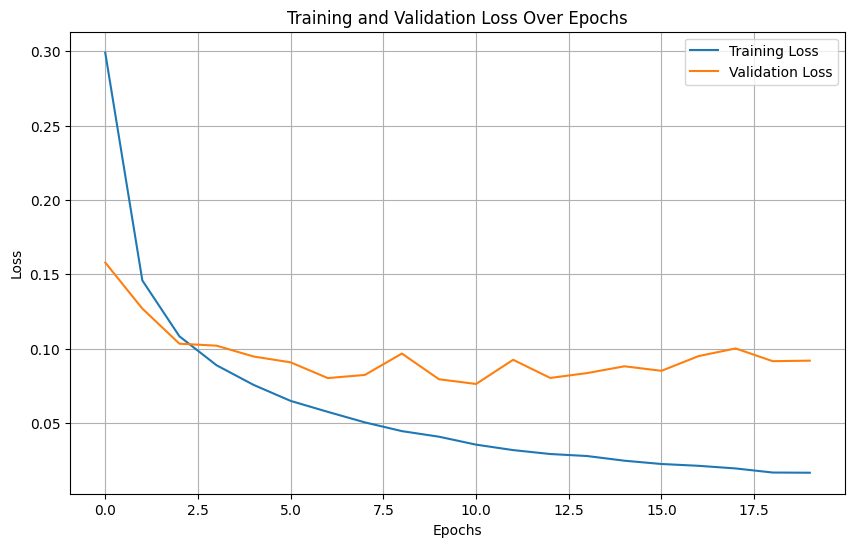

Plot saved to plots\filter_avg_loss
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9748 - loss: 0.1107
Test accuracy: 0.9779000282287598
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


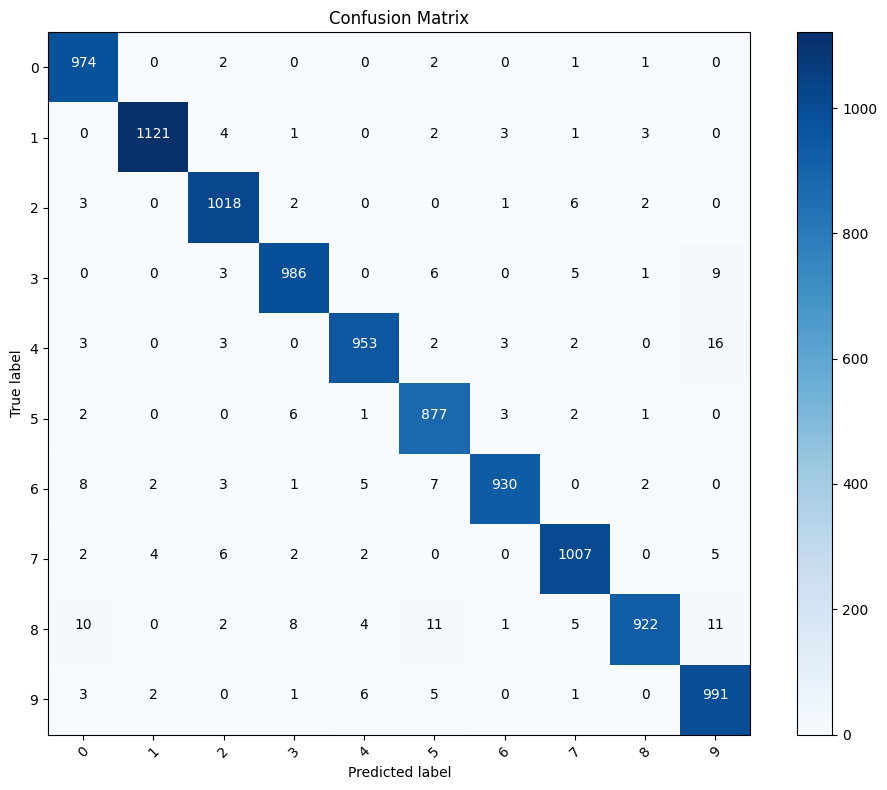

Plot saved to plots\filter_avg_confusion_matrix_simple_model


In [9]:
# re run 5-7 steps for the data after the filter
simple_model_main(train=train_filtered, test=test_filtered, file_prefix="filter_avg")

In [10]:
# filter average model results
filter_avg_report = get_model_results("model_results/filter_avg_model.json")
print(f"average filter model results: {filter_avg_report}")

average filter model results: {'Precision': 0.9780737595689654, 'Recall (Sensitivity)': 0.9779, 'F1 Score': 0.977889164328485, 'Sensitivity': 0.9779, 'Specificity': 0.9779}


shape of data after pca is (10000, 50)
Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8158 - loss: 0.6688 - val_accuracy: 0.9483 - val_loss: 0.1783
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9524 - loss: 0.1612 - val_accuracy: 0.9639 - val_loss: 0.1255
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9688 - loss: 0.1103 - val_accuracy: 0.9698 - val_loss: 0.1026
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9774 - loss: 0.0812 - val_accuracy: 0.9723 - val_loss: 0.0928
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9809 - loss: 0.0649 - val_accuracy: 0.9745 - val_loss: 0.0858
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9845 - loss: 0.0567 - val_accuracy: 0.9753 - val_loss: 0.0805
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9861 - loss: 0.0487 - val_accuracy: 0.9761 - val_loss: 0.0819
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/st

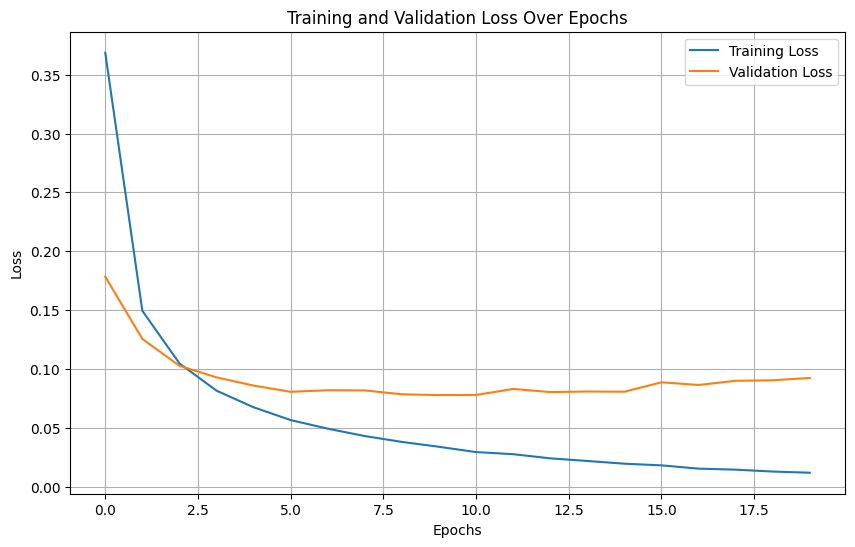

Plot saved to plots\pca_loss
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9738 - loss: 0.0966
Test accuracy: 0.9775000214576721
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


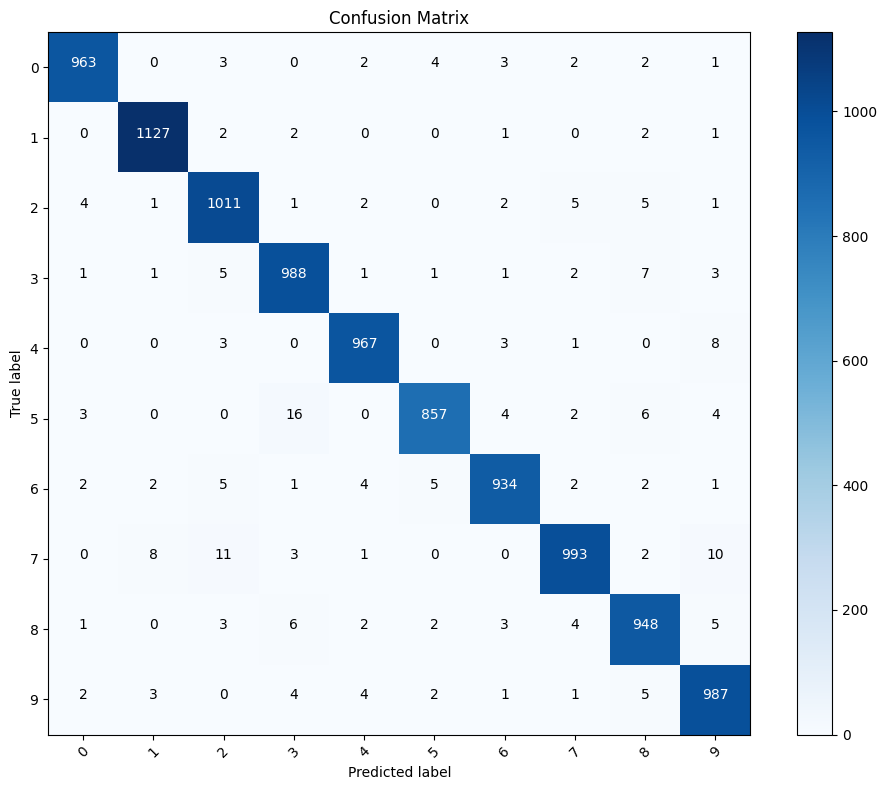

Plot saved to plots\pca_confusion_matrix_simple_model


In [11]:
# section 10 a
train_pca, test_pca = apply_pca_reduction(train, test)

# running model on pca data
simple_model_main(train=train_pca, test=test_pca, file_prefix="pca", input_shape=(50,))

In [12]:
# pca model results
pca_report = get_model_results("model_results/pca_model.json")
print(f"pca filter model results: {pca_report}")

pca filter model results: {'Precision': 0.9775554513138597, 'Recall (Sensitivity)': 0.9775, 'F1 Score': 0.9774970906579805, 'Sensitivity': 0.9775, 'Specificity': 0.9775}


## 12 . Compare the results of the classification applied to pca datasets and the original dataset.
PCA smooth the validation and improve performance, this is due to reduce dimensions.

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7731 - loss: 0.8862 - val_accuracy: 0.9205 - val_loss: 0.2709
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9210 - loss: 0.2740 - val_accuracy: 0.9392 - val_loss: 0.2076
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9373 - loss: 0.2120 - val_accuracy: 0.9510 - val_loss: 0.1729
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9489 - loss: 0.1738 - val_accuracy: 0.9549 - val_loss: 0.1552
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9583 - loss: 0.1453 - val_accuracy: 0.9593 - val_loss: 0.1367
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9629 - loss: 0.1311 - val_accuracy: 0.9643 - val_loss: 0.1241
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9665 - loss: 0.1142 - val_accuracy: 0.9652 - val_loss: 0.1152
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9702 - loss: 0.1015 - 

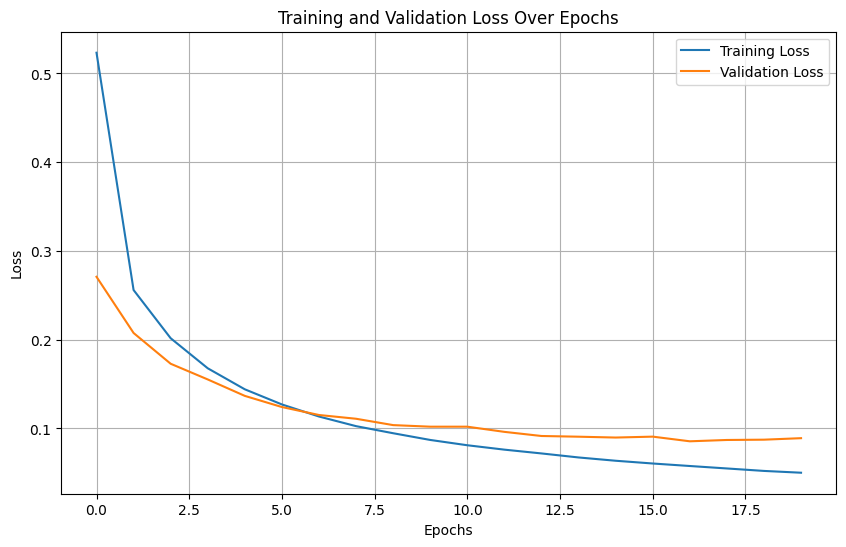

Plot saved to plots\non_overlapping_loss
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9697 - loss: 0.0942
Test accuracy: 0.9753000140190125
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


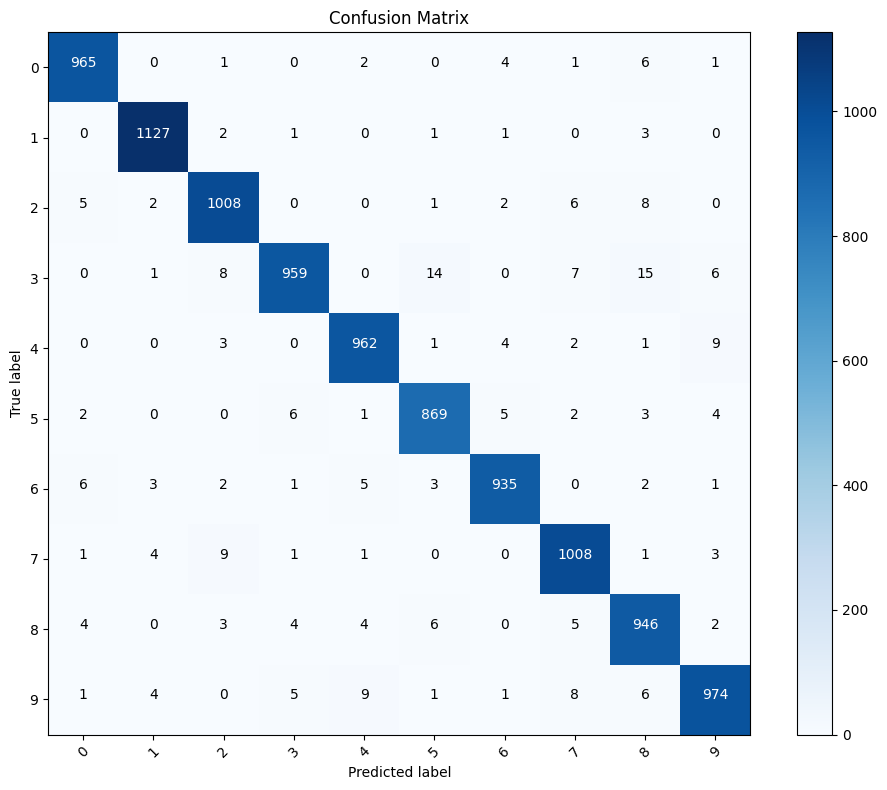

Plot saved to plots\non_overlapping_confusion_matrix_simple_model


In [13]:
# section 10 b
train_non_ovelapping, test_non_ovelapping = create_non_overlapping_filter_dataset(
    train, test
)

# section 11 - running model on 3x3 convolution non overlapping
simple_model_main(
    train=train_non_ovelapping,
    test=test_non_ovelapping,
    file_prefix="non_overlapping",
    input_shape=(10 * 10,),
)

In [14]:
# filter average model results
non_overlap_report = get_model_results("model_results/non_overlapping_model.json")
print(f"3x3 non overlapping filter model results: {non_overlap_report}")

3x3 non overlapping filter model results: {'Precision': 0.975357523591357, 'Recall (Sensitivity)': 0.9753, 'F1 Score': 0.9752870246481429, 'Sensitivity': 0.9753, 'Specificity': 0.9753}


## 12 . Compare the results of the classification applied to 3x3 convolution datasets and the original dataset.
the original dataset performs better because non-overlapping kernels can miss data and sum the image to a compressed image with
feature map that tries to grasp the importance of regions in the original image, perhaps a sliding kernel can improve our results.


Original class distribution: Counter({1: 6742, 7: 6265, 3: 6131, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 8: 5851, 4: 5842, 5: 5421})
Undersample class distribution: Counter({3: 6131, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 8: 5851, 4: 5842, 5: 5421, 1: 3500, 7: 3500})
Oversample class distribution: Counter({3: 9631, 8: 9351, 1: 6742, 7: 6265, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 4: 5842, 5: 5421})


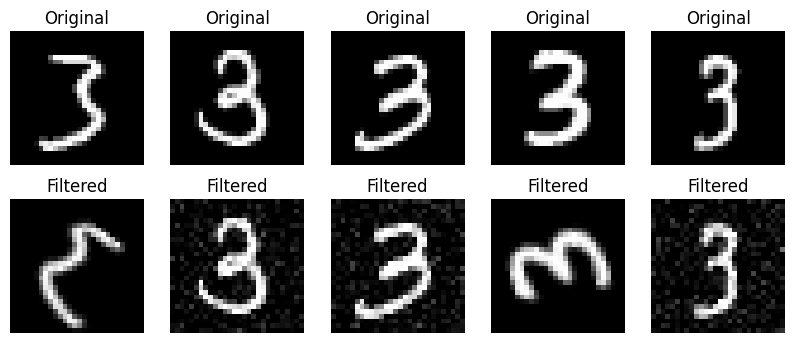

Plot saved to plots\comparison_augmented_vs_unaugmented


In [15]:
# Section 13-14 - please see imbalance.py
train_under, train_over_aug = prepare_over_and_under_datasets(x=train[0], y=train[1])

Epoch 1/20
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8588 - loss: 0.4992 - val_accuracy: 0.9370 - val_loss: 0.2099
Epoch 2/20
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9572 - loss: 0.1440 - val_accuracy: 0.9591 - val_loss: 0.1370
Epoch 3/20
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9738 - loss: 0.0893 - val_accuracy: 0.9683 - val_loss: 0.1065
Epoch 4/20
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9817 - loss: 0.0642 - val_accuracy: 0.9688 - val_loss: 0.1071
Epoch 5/20
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9857 - loss: 0.0496 - val_accuracy: 0.9726 - val_loss: 0.0980
Epoch 6/20
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9904 - loss: 0.0356 - val_accuracy: 0.9683 - val_loss: 0.1090
Epoch 7/20
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9925 - loss: 0.0288 - val_accuracy: 0.9692 - val_loss: 0.1122
Epoch 8/20
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9936 - loss: 0.0237 - 

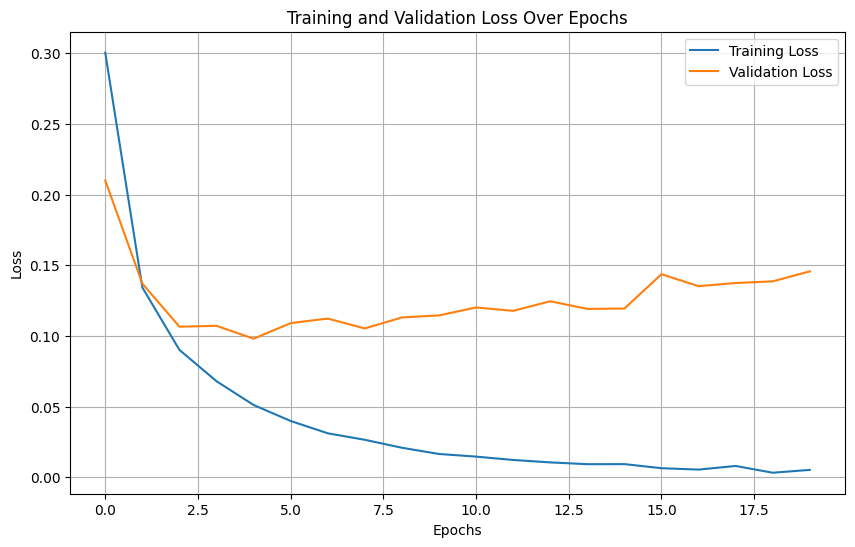

Plot saved to plots\filter_undersample_loss
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9701 - loss: 0.1612
Test accuracy: 0.9758999943733215
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


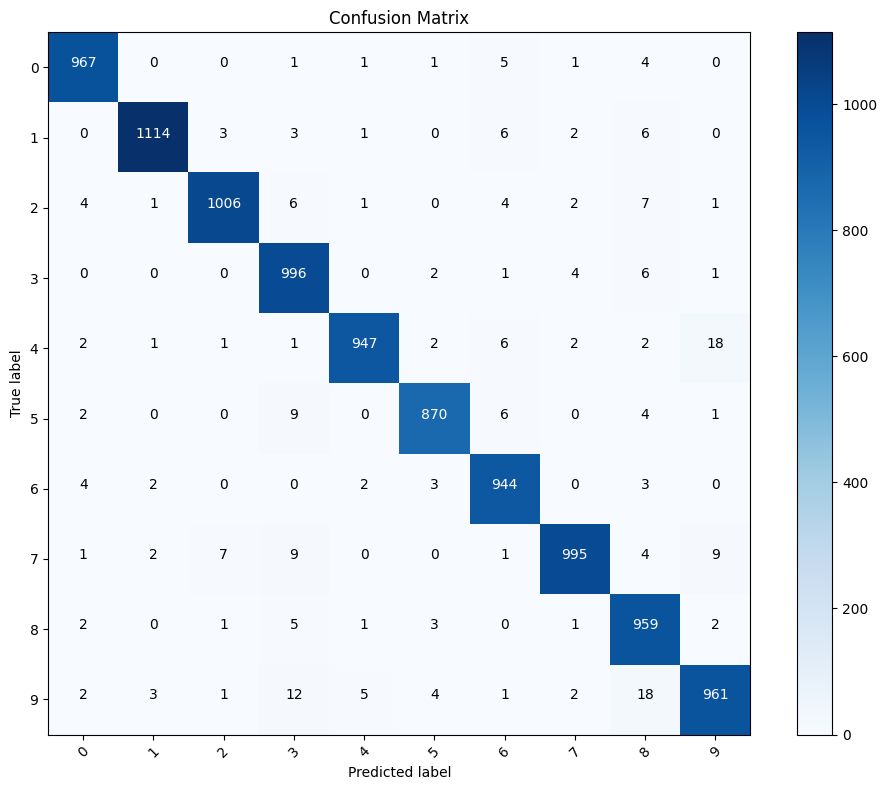

Plot saved to plots\filter_undersample_confusion_matrix_simple_model


In [16]:
# Section 14 data from 13 a - undersampling of two classes  - (Sections 11 -> 5,6,7) please see simple_model.py
simple_model_main(train=train_under, test=test, file_prefix="filter_undersample")

In [17]:
# filter average model results
undersample_report = get_model_results("model_results/filter_undersample_model.json")
print(f"under sample filter model results: {undersample_report}")

under sample filter model results: {'Precision': 0.9761618085484235, 'Recall (Sensitivity)': 0.9759, 'F1 Score': 0.9759258130519318, 'Sensitivity': 0.9759, 'Specificity': 0.9759}


# Compare the results of the classification applied to each of the under sample dataset and the original dataset.
results are quite similar however the validation is inconsistent due to class imbalance distribution

Epoch 1/20
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8664 - loss: 0.4600 - val_accuracy: 0.7135 - val_loss: 1.2888
Epoch 2/20
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9633 - loss: 0.1263 - val_accuracy: 0.7303 - val_loss: 1.3261
Epoch 3/20
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9753 - loss: 0.0834 - val_accuracy: 0.7293 - val_loss: 1.5441
Epoch 4/20
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9823 - loss: 0.0590 - val_accuracy: 0.7535 - val_loss: 1.4559
Epoch 5/20
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9863 - loss: 0.0455 - val_accuracy: 0.7528 - val_loss: 1.6078
Epoch 6/20
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9897 - loss: 0.0340 - val_accuracy: 0.7452 - val_loss: 1.9670
Epoch 7/20
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9918 - loss: 0.0280 - val_accuracy: 0.7576 - val_loss: 1.7949
Epoch 8/20
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9941 - loss: 0.0202 - 

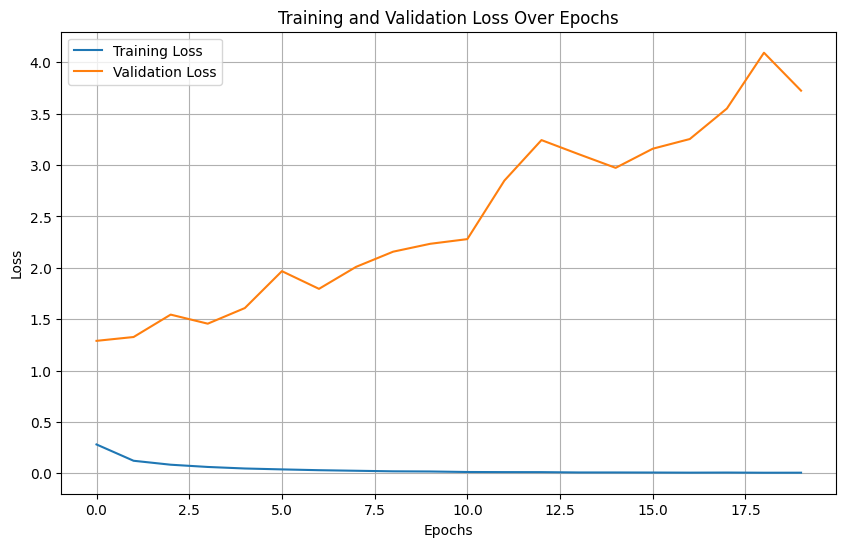

Plot saved to plots\filter_oversample_loss
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9726 - loss: 0.1451
Test accuracy: 0.9772999882698059
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


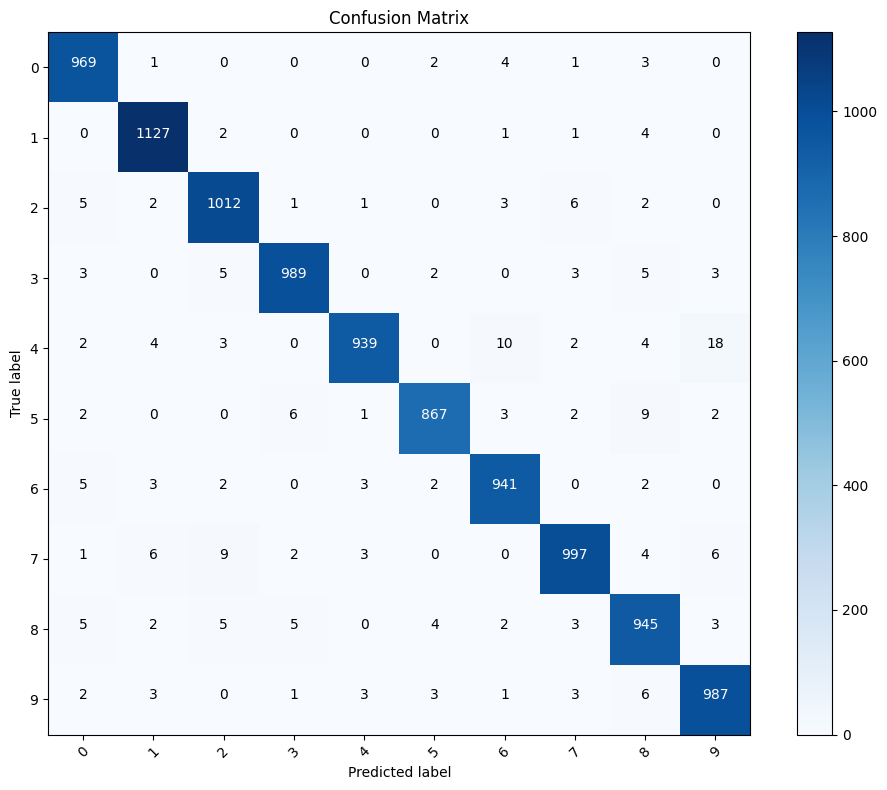

Plot saved to plots\filter_oversample_confusion_matrix_simple_model


In [18]:
# Section 14 data from 13 b - Oversampling of two classes by image augmentation  - (Sections 11 -> 5,6,7) please see simple_model.py
simple_model_main(train=train_over_aug, test=test, file_prefix="filter_oversample")

In [19]:
# filter average model results
overample_report = get_model_results("model_results/filter_oversample_model.json")
print(f"over sample model results: {overample_report}")

over sample model results: {'Precision': 0.9773780947350895, 'Recall (Sensitivity)': 0.9773, 'F1 Score': 0.9772901723704983, 'Sensitivity': 0.9773, 'Specificity': 0.9773}


# Compare the results of the classification applied to each of the over sample dataset and the original dataset.
on the train dataset the oversample is overfitted due to many samples from same class, we can see on the validation is extermly different as if one of the oversample class can cause major divergence.